In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from qsprLib import *

pd.options.display.mpl_style = 'default'
%matplotlib inline

data_id = 21
Xtrain = pd.read_csv('/home/loschen/Desktop/datamining-kaggle/numerai/data/numerai_datasets_'+str(data_id)+'/numerai_training_data.csv')
ytrain = Xtrain['target']
Xtrain.drop(['target'],axis=1,inplace=True)
Xtest =  pd.read_csv('/home/loschen/Desktop/datamining-kaggle/numerai/data/numerai_datasets_'+str(data_id)+'/numerai_tournament_data.csv')
Xtest.drop(['t_id'],axis=1,inplace=True)
Xtrain['test'] = 0
Xtest['test'] = 1
Xall = pd.concat([Xtest, Xtrain], ignore_index=True)
print Xtrain.shape
print Xtest.shape
y = Xall['test']
Xall.drop(['test'],axis=1,inplace=True)
Xtrain.drop(['test'],axis=1,inplace=True)
print Xall.head(5)

(96320, 22)
(36069, 22)
   feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0  0.998597  0.962135  0.474424  0.397017  0.747835  0.490444  0.348610   
1  0.640561  0.535377  0.747906  0.058272  0.319811  0.479179  0.715161   
2  0.806886  0.535228  0.233341  0.869270  0.642157  0.380417  0.645031   
3  0.723529  0.511598  0.491868  0.086773  0.233891  0.639297  0.268560   
4  0.981611  0.715084  0.515943  0.330296  0.145273  0.434277  0.946169   

   feature8  feature9  feature10    ...      feature12  feature13  feature14  \
0  0.927024  0.754964   0.601444    ...       0.812625   0.294137   0.634636   
1  0.274235  0.008252   0.002401    ...       0.799245   0.253041   0.729576   
2  0.689936  0.831643   0.912811    ...       0.750655   0.126558   0.263562   
3  0.507851  0.087346   0.055295    ...       0.648740   0.233070   0.382944   
4  0.104733  0.025793   0.124876    ...       0.974505   0.039401   0.702375   

   feature15  feature16  feature17  feature1

In [3]:
Xtrain.columns

Index([u'feature1', u'feature2', u'feature3', u'feature4', u'feature5',
       u'feature6', u'feature7', u'feature8', u'feature9', u'feature10',
       u'feature11', u'feature12', u'feature13', u'feature14', u'feature15',
       u'feature16', u'feature17', u'feature18', u'feature19', u'feature20',
       u'feature21'],
      dtype='object')

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN().fit(Xtrain)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
print "In core:",db.core_sample_indices_.shape
labels = db.labels_
noise_labels = labels == -1
print "Noise:",noise_labels.sum()

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print "cluster:",n_clusters_
plt.hist(labels)

In [28]:
Xtrain['clusters'] = labels
grouped = Xtrain.groupby('clusters')


In [29]:
grouped.groups

{-1: [120,
  1033,
  1744,
  5634,
  6039,
  6703,
  7155,
  9046,
  9136,
  12486,
  14569,
  20063,
  21931,
  23404,
  28355,
  29674,
  30505,
  34432,
  39299,
  40132,
  46504,
  49759,
  55998,
  57622,
  59973,
  60084,
  60866,
  69818,
  72205,
  72572,
  72739,
  74104,
  76488,
  78302,
  81827,
  84438,
  88814,
  93452],
 0: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,

<function tsne.bh_sne>

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family [u'monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


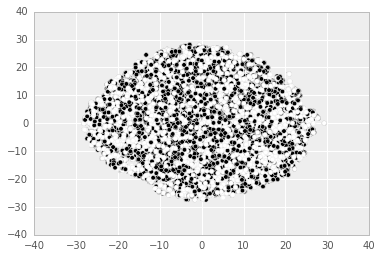

In [28]:
cv = StratifiedShuffleSplit(y,n_iter=5,test_size=0.2)

#model = LogisticRegression(C=1.0,penalty='l2')
model = RandomForestClassifier(n_estimators=50)
buildModel(model,Xall,y,cv=cv, scoring='roc_auc', n_jobs=1,trainFull=False,verbose=True)

[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -  21.8s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -  21.1s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -  21.7s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -  22.1s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -  21.6s
cv-score: 0.8212 +/- 0.0029
all scores: array([ 0.82190009,  0.82244834,  0.81610481,  0.82049188,  0.82490862])


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished


array([ 0.82190009,  0.82244834,  0.81610481,  0.82049188,  0.82490862])

0.0891605066446
0.775759793729


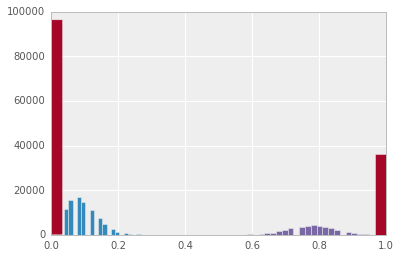

In [29]:
model.fit(Xall,y)
Xall['sim'] = model.predict_proba(Xall)[:,1]

Xtrain = Xall[len(Xtest.index):]
Xtest = Xall[:len(Xtest.index)]
print Xtrain['sim'].mean()
print Xtest['sim'].mean()


Xtrain['sim'].hist(bins=30)
Xtest['sim'].hist(bins=30)
y.hist(bins=30)
plt.show()

In [24]:

ypred = model.predict_proba(Xtrain)

[False  True  True ..., False False False]


(array([  3.90740000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   3.56320000e+04,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.59990000e+04,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.51500000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

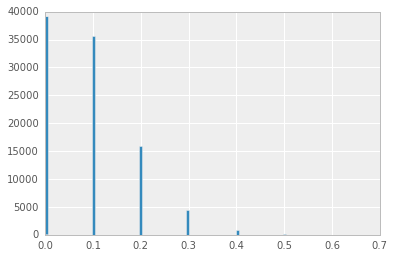

In [28]:
train_mask = ypred[:,1] > 0.1
print train_mask
plt.hist(ypred[:,1],bins=100)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=7, n_init=3,
    n_jobs=4, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
PC analysis for train/test


AttributeError: 'KMeans' object has no attribute 'explained_variance_ratio_'

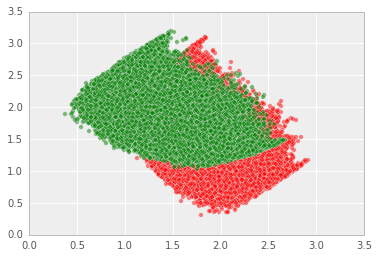

In [22]:
reducer = KMeans(init='k-means++', n_clusters=7, n_init=3,n_jobs=4)
pcAnalysis(Xtrain, Xtest, y=y, w=None, ncomp=7, transform=False, classification=False,reducer = reducer)

In core: (93872,)
Noise: 804
cluster: 14


[    0     1     2 ..., 96317 96318 96319]
14


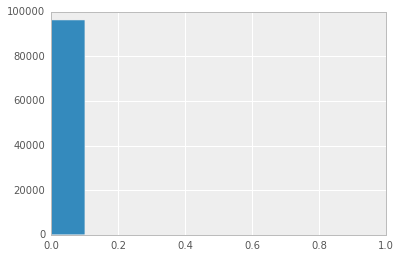

In [24]:
plt.hist(labels>0)

print db.core_sample_indices_
print n_clusters_

In [33]:
print db.labels_.shape

(96320,)


/usr/local/lib/python2.7/dist-packages/matplotlib/lines.py:1107: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


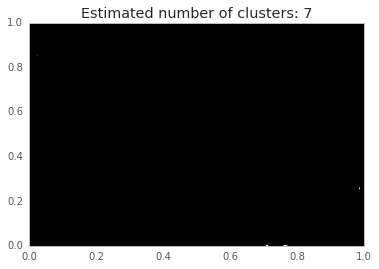

In [36]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = Xtrain.values[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = Xtrain.values[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
from tsne import bh_sne
X_2d = bh_sne(Xtrain)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=ytrain)
bh_sne